In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
from collections import defaultdict

In [2]:
#import cleaned data
df= pd.read_csv('df cleaned.csv', index_col = 0)

In [3]:
#transform type of ingredient_list from string to list 
df['ingredient_list'] = df.ingredient_list.apply(ast.literal_eval)

In [4]:
#add full_name to data frame
df['full_name'] = df.brand + ' ' + df.name

In [5]:
#make full_name first column
col_list = df.columns.to_list()
col_list.insert(0, col_list.pop())
df = df[col_list]

In [6]:
#change rating to customer_rating
col_list = df.columns.to_list()
col_list[col_list.index('rating')] = 'customer_rating'
df.columns = col_list
df.head()

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,dry,oily,combination,sensitive,redness,acne,aging,spots,dull,normal
0,Youth To The People Superfood Antioxidant Clea...,https://www.sephora.com/product/kale-spinach-g...,cleanser,Youth To The People,Superfood Antioxidant Cleanser,4.3,36.0,what it is: an award-winning face wash with co...,8 oz,"[water, cocamidopropyl hydroxysultaine, sodium...",...,True,True,True,False,False,False,True,False,True,True
1,Fresh Soy Makeup Removing Face Wash,https://www.sephora.com/product/soy-face-clean...,cleanser,Fresh,Soy Makeup Removing Face Wash,4.4,38.0,what it is: a bestselling three-in-one face wa...,5.1 oz,"[water, coco-glucoside, glycerin, butylene gly...",...,True,True,True,True,False,False,False,False,True,True
2,Farmacy Green Clean Makeup Removing Cleansing ...,https://www.sephora.com/product/green-clean-ma...,cleanser,Farmacy,Green Clean Makeup Removing Cleansing Balm,4.5,34.0,what it is: a makeup remover and face cleanser...,3.4 oz,"[cetyl ethylhexanoate, caprylic/capric triglyc...",...,True,True,True,False,False,False,True,False,True,True
3,Tatcha The Deep Cleanse Gentle Exfoliating Cle...,https://www.sephora.com/product/the-deep-clean...,cleanser,Tatcha,The Deep Cleanse Gentle Exfoliating Cleanser,4.2,38.0,which skin type is it good for?\n✔ normal\n✔ o...,5 oz,"[water, sodium cocoyl glutamate, propanediol, ...",...,True,True,True,True,False,False,False,False,True,True
4,Tatcha The Rice Wash Skin-Softening Cleanser,https://www.sephora.com/product/tatcha-the-ric...,cleanser,Tatcha,The Rice Wash Skin-Softening Cleanser,4.6,35.0,"what it is: a ph-neutral, daily cream cleanser...",4.0 oz,"[aqua/water/eau, microcrystalline cellulose, p...",...,True,False,True,False,False,False,False,False,False,True


4.160741885625971
4.2


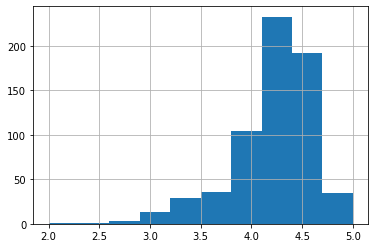

In [7]:
#analyze customer ratings 
print(df.customer_rating.mean())
print(df.customer_rating.median())
df.customer_rating.hist()

62.770559210526315
47.0


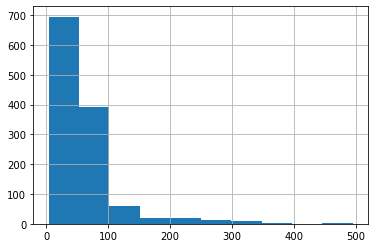

In [8]:
#analyze price
print(df.price.mean())
print(df.price.median())
df.price.hist()

In [9]:
#most expensive product
df[df.price==df.price.max()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,dry,oily,combination,sensitive,redness,acne,aging,spots,dull,normal
569,Perricone MD Neuropeptide Smoothing Facial Con...,https://www.sephora.com/product/neuropeptide-f...,serum,Perricone MD,Neuropeptide Smoothing Facial Conformer,4.3,495.0,which skin type is it good for?\n✔ normal\n✔ o...,2 oz,"[water, c12-15 alkyl benzoate, butylene glycol...",...,True,True,True,True,False,False,True,False,True,True


In [10]:
#products with the least number of ingredients
df[df.num_ingredients == df.num_ingredients.min()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,dry,oily,combination,sensitive,redness,acne,aging,spots,dull,normal
278,Biossance Squalane + Vitamin C Rose Oil,https://www.sephora.com/product/squalane-vitam...,serum,Biossance,Squalane + Vitamin C Rose Oil,4.4,72.0,"what it is: a bestselling, hydrating vitamin c...",1.01 oz,"[squalane, pistacia lentiscus (mastic) gum, ro...",...,True,True,True,False,False,False,True,False,True,True
630,Dr Roebuck's Ningaloo Copper Peptide Firming S...,https://www.sephora.com/product/ningaloo-coppe...,serum,Dr Roebuck's,Ningaloo Copper Peptide Firming Serum,NaN,68.0,"what it is: a breakthrough, six-ingredient ser...",1.01 oz,"[water, sodium hyaluronate, sodium acetylated ...",...,True,True,True,False,False,False,True,False,False,True


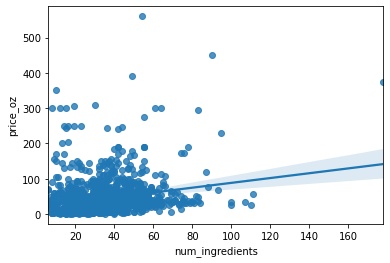

In [11]:
#correlation between number of ingredients and price
sns.regplot(df.num_ingredients, df.price_oz)

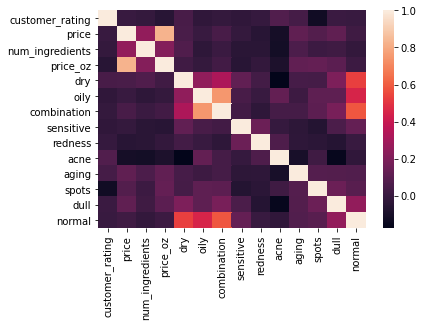

In [12]:
#correlations in the data
sns.heatmap(df.corr())

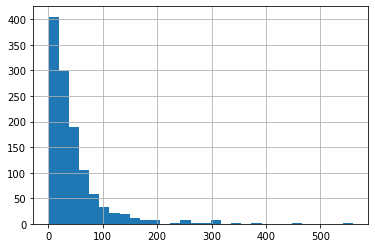

In [13]:
#distribution of price per ounce
df.price_oz.hist(bins=30)

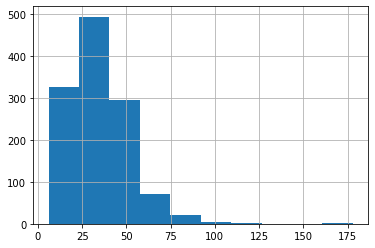

In [14]:
#distribution of number of ingredients
df.num_ingredients.hist()

In [15]:
#averages by category
df.groupby('category').mean()

,customer_rating,price,num_ingredients,price_oz,dry,oily,combination,sensitive,redness,acne,aging,spots,dull,normal
category,,,,,,,,,,,,,,
cleanser,4.243874,33.838745,26.439216,7.417287,0.819608,0.792157,0.792157,0.333333,0.180392,0.192157,0.301961,0.027451,0.419608,0.776471
moisturizer,4.177273,66.579261,41.902174,40.743430,0.871739,0.658696,0.763043,0.241304,0.167391,0.076087,0.497826,0.089130,0.456522,0.795652
serum,4.130418,80.341792,32.682809,71.296484,0.854722,0.789346,0.837772,0.186441,0.147700,0.133172,0.547215,0.242131,0.576271,0.866828
sunscreen,4.002299,44.232955,34.920455,41.991294,0.761364,0.681818,0.704545,0.295455,0.159091,0.068182,0.488636,0.159091,0.238636,0.761364


In [16]:
#medians by category
df.groupby('category').median()

,customer_rating,price,num_ingredients,price_oz,dry,oily,combination,sensitive,redness,acne,aging,spots,dull,normal
category,,,,,,,,,,,,,,
cleanser,4.3,32.0,25,5.93,True,True,True,False,False,False,False,False,False,True
moisturizer,4.3,52.5,40,32.06,True,True,True,False,False,False,False,False,False,True
serum,4.2,65.0,31,58.00,True,True,True,False,False,False,True,False,True,True
sunscreen,4.1,36.0,35,25.33,True,True,True,False,False,False,False,False,False,True


In [17]:
#load skincare ingredient dictionary
skincare_ingredients = pd.read_csv('edited skincare dictionary.csv', index_col=0)

In [18]:
#create a list of ingredients who's names are contained in other ingredients 
problem_ingredients = ['acid', 'alcohol', 'ethanol', 'pha', 'tea', 'glycol', 'gla', 'lye', 'age', 'mea']

In [19]:
#function that finds product and rates the ingredients found in the skincare dictionary
def find_ingredients(product, shift=0):
    
    #initialize dictionaries, lists, and counts
    rated_ingredients = defaultdict(list) #list of ingredients, gouped by rating 
    rating_counts = defaultdict(int) #counts of ingredients, grouped by rating 
    no_matches = [] #list of ingredients not found in the skincare dictionary
    ingredients_rating = 0 #running total of product ingredient ratings
    num_known = 0 #number of ingredients found in the skincare dictionary
    if type(product) != int: 
        if '+' in product:
            product = product.replace('+', '\+')
        try:
            #create a list of products matching query (case insensitive)
            indices = df[df.full_name.str.contains(product, case=False)].index.to_list()
            while len(indices) != 1:
                #if there are no matches, print error message and return nothing
                if len(indices) == 0:
                    print('product not found')
                    return None
                #if there is more than one matching product, print matches and ask user to clarify until there is one match
                else:
                    print("did you mean...")
                    print()
                    for i in df.loc[indices].full_name:
                        print (i)
                    print('------------')
                    product = input()
                    if product in ['no', 'exit', 'stop', 'quit']:
                        return None
                    if '+' in product:
                        product = product.replace('+', '\+')
                    indices = df[df.full_name.str.contains(product, case=False)].index.to_list()
            #once product is found, grab list of product ingredients
            product_info = df.loc[indices[0]]
            product_ingredients = product_info.ingredient_list
        except:
            print("something went wrong :/")
    else:
        product_info = df.loc[product]
        product_ingredients = product_info.ingredient_list

    #loop through product ingredients 
    for num, i in enumerate(product_ingredients):
        match = False
        #for every ingredient, loop through skincare dicitionary to find a match
        for j in skincare_ingredients.ingredient:
            if j in i:
                #if there is a match, cross reference match with problem ingredient list to ensure true match
                if (j not in problem_ingredients) or ((j in problem_ingredients) and (j == i)):
                    match = True
                    #grab numeric rating of ingredient from skincare dictionary
                    num_rating = skincare_ingredients[skincare_ingredients.ingredient == j].rating_num.values[0]
                    #grab word rating of ingredient from skincare dictionary
                    word_rating = skincare_ingredients[skincare_ingredients.ingredient == j].rating.values[0]
                    #increase count of rating by 1
                    rating_counts[word_rating]+= 1
                    #append numbered ingredient to list of ingredients grouped by rating
                    rated_ingredients[word_rating].append(str(num+1)+'. '+j)
                    #add ingredient rating to running total 
                    ingredients_rating+=num_rating
                    #increase number of known ingredients by 1
                    num_known +=1
                    #stop searching through the skincare dictionary for a match 
                    break
        #if there is no match, append ingredient to list of unknown ingredients 
        if not match: 
            no_matches.append(str(num+1)+'. '+i)
    try:
        #divide running total of ratings by number of known ingredients, scale, and shift rating  
        ingredients_rating = (ingredients_rating / num_known) * 20 + shift
    except:
        print('could not calculate rating')
    print('------------')
    print(product_info.full_name)
    print('------------')
    print("number of ingredients:", len(product_ingredients))
    print("known:", num_known)
    print("unknown: ", len(no_matches))
    print("------------")
    print("unknown ingredients:") 
    for i in no_matches:
        print(i)
    print("------------")
    print("ingredient ratings:")
    for key, val in rated_ingredients.items():
        print(key+':', val)
        print("-----")
    print("unweighted ingredient rating:",round(ingredients_rating))
    print("rating breakdown:")
    for key, val in rating_counts.items():
        print(key+':', val)

In [20]:
find_ingredients(0, shift=10)

------------
Youth To The People Superfood Antioxidant Cleanser
------------
number of ingredients: 29
known: 25
unknown:  4
------------
unknown ingredients:
7. brassica oleracea acephala (kale) extract
8. spinacia oleracea (spinach) leaf extract
27. chlorophyllin-copper complex (ci 75810)
28. gardenia jasminoides (jasmine) fruit extract
------------
ingredient ratings:
Good: ['1. water', '2. cocamidopropyl hydroxysultaine', '3. sodium cocoyl glutamate', '4. aloe barbadensis', '5. sorbeth-230 tetraoleate', '6. polysorbate 20', '16. decyl glucoside', '17. sorbitan laurate', '18. tetrasodium glutamate diacetate', '20. calcium gluconate', '21. ethylhexylglycerin', '22. dextrin', '23. citric acid', '24. phenoxyethanol', '25. potassium', '26. sodium benzoate']
-----
Best: ['9. camellia sinensis', '10. medicago sativa', '11. chamomilla recutita', '12. tetrahexyldecyl ascorbate', '13. glycerin', '14. panthenol', '15. tocopheryl acetate', '19. gluconolactone']
-----
Poor: ['29. fragrance']
--

In [21]:
#create function that calculates rating from a list of ingredients
def calculate_rating(ingredients, shift=0, percent=False):
    #initialize rating, number of known/unknown ingredients
    ingredients_rating = 0
    num_known = 0
    no_matches = 0
    #loop through ingredients and skincare dictionary to find a match
    for i in ingredients:
        match = False
        for j in skincare_ingredients.ingredient:
            if j in i:
                if (j not in problem_ingredients) or ((j in problem_ingredients) and (j == i)):
                    match = True
                    #grab rating from skincare dictionary
                    num_rating = skincare_ingredients[skincare_ingredients.ingredient == j].rating_num.values[0]
                    #running total of ratings
                    ingredients_rating += num_rating
                    #increase number of known ingredients by 1
                    num_known += 1
                    #stop searching through skincare dictionary once match for ingredient is found
                    break
        
        #if there is no match, increase number of unknown ingredients by 1
        if match == False: 
            no_matches+=1
        
    if percent:
        try:
            #find the percent of known ingredients
            percent_known = round(num_known/(num_known+no_matches),2)
        except:
            print('error could not caclulate percent known')
            return np.nan
        return percent_known
    
    try:
        #find average rating, scale by 20, add shift 
        ingredients_rating = round((ingredients_rating / num_known) * 20 + shift)
    except:
        print('error could not calculate rating')
        return np.nan

    return ingredients_rating

In [22]:
#calculate ingredient ratings for all products 
df['ingredients_rating'] = df.ingredient_list.apply(calculate_rating, shift=10)

error could not calculate rating
error could not calculate rating


In [23]:
#analyze rows with errors
df[df.ingredients_rating.isnull()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,oily,combination,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating
536,philosophy Time In A Bottle 100% In-Control,https://www.sephora.com/product/time-in-bottle...,serum,philosophy,Time In A Bottle 100% In-Control,4.0,76.0,which skin type is it good for?\n✔ normal\n✔ o...,1.3 oz,"[adored by celebrities, dermatologists and, mo...",...,True,True,True,False,False,True,False,True,True,NaN
1028,Kiehl's Since 1851 Dermatologist Solutions™ Ce...,https://www.sephora.com/product/centella-sensi...,moisturizer,Kiehl's Since 1851,Dermatologist Solutions™ Centella Sensitive Ci...,NaN,44.0,which skin type is it good for?\n✔ sensitive\n...,1.7 oz,[kiehl’s began as an apothecary in new york ci...,...,False,False,True,True,False,False,False,False,True,NaN


In [24]:
#drop 2 rows without ingredients
df.drop(df[df.ingredients_rating.isnull()].index, inplace=True)

In [25]:
#analyze products with lowest rating
df[df.ingredients_rating == df.ingredients_rating.min()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,oily,combination,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating
192,Lancôme EAU FRAÎCHE DOUCEUR Micellar Cleansing...,https://www.sephora.com/product/eau-fraiche-do...,cleanser,Lancôme,EAU FRAÎCHE DOUCEUR Micellar Cleansing Water F...,4.5,40.0,a luxurious balance of science and nature:\nre...,6.7 oz,[lancôme epitomizes the french touch with effo...,...,False,False,True,False,False,False,False,False,False,-10.0
1126,Estée Lauder Resilience Lift Firming/Sculpting...,https://www.sephora.com/product/resilience-lif...,moisturizer,Estée Lauder,Resilience Lift Firming/Sculpting Face and Nec...,3.3,82.0,what it is:\na face and neck cream for normal ...,1.7 oz,[estée lauder offers an unparalleled collectio...,...,False,True,False,False,True,False,False,False,True,-10.0


In [26]:
#drop products with minimum rating because these did not contain ingredients
df.drop(df[df.ingredients_rating == df.ingredients_rating.min()].index, inplace=True)

In [27]:
#reset index
df = df.reset_index(drop=True)

In [28]:
#analyze product with lowest rated ingredients after dropping rows
df[df.ingredients_rating == df.ingredients_rating.min()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,oily,combination,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating
174,Mario Badescu Glycolic Foaming Cleanser,https://www.sephora.com/product/mario-badescu-...,cleanser,Mario Badescu,Glycolic Foaming Cleanser,4.3,16.0,what it is: a resurfacing face wash that refin...,6 oz,"[sodium lauryl sulfate, water, cocamidopropyl ...",...,True,True,False,False,False,False,False,True,True,33.0
531,Clarins Lotus Face Treatment Oil,https://www.sephora.com/product/lotus-face-tre...,serum,Clarins,Lotus Face Treatment Oil,4.4,60.0,what it is:\na natural astringent for oily or ...,1 oz,"[corylus avellana (hazel) seed oil, pelargoniu...",...,True,True,False,False,False,False,False,False,False,33.0


In [29]:
find_ingredients(174)

------------
Mario Badescu Glycolic Foaming Cleanser
------------
number of ingredients: 16
known: 13
unknown:  3
------------
unknown ingredients:
4. cocamide mea
7. hypericum perforatum extract
9. althaea officinalis leaf/root extract
------------
ingredient ratings:
Poor: ['1. sodium lauryl sulfate', '6. salvia officinalis', '10. achillea millefolium', '12. fragrance', '14. ethylparaben', '15. propylparaben', '16. diazolidinyl urea']
-----
Good: ['2. water', '3. betaine', '11. sodium chloride', '13. propylene glycol']
-----
Best: ['5. glycolic acid', '8. chamomilla recutita']
-----
unweighted ingredient rating: 23.0
rating breakdown:
Poor: 7
Good: 4
Best: 2


In [30]:
find_ingredients(531)

------------
Clarins Lotus Face Treatment Oil
------------
number of ingredients: 16
known: 12
unknown:  4
------------
unknown ingredients:
2. pelargonium graveolens flower oil
6. anthemis nobilis flower oil
8. belumbium speciosum flower extract
16. benzyl benzoate
------------
ingredient ratings:
Good: ['1. corylus avellana', '4. rosmarinus officinalis', '15. coumarin']
-----
Poor: ['3. fragrance', '7. salvia sclarea (clary) oil', '10. citronellol', '11. linalool', '13. limonene', '14. citral']
-----
Best: ['5. helianthus annuus (sunflower) seed oil', '9. tocopherol']
-----
Average: ['12. geraniol']
-----
unweighted ingredient rating: 23.0
rating breakdown:
Good: 3
Poor: 6
Best: 2
Average: 1


In [31]:
#analyze product with top rated ingredient list
df[df.ingredients_rating == df.ingredients_rating.max()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,oily,combination,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating
432,Caudalie Premier Cru Anti-Aging Serum,https://www.sephora.com/product/premier-cru-se...,serum,Caudalie,Premier Cru Anti-Aging Serum,4.1,150.0,which skin type is it good for?\n✔ normal\n✔ o...,1 oz,"[polyphenols, viniferine, vine resveratrol, vi...",...,True,True,True,False,False,True,True,True,True,110.0


In [32]:
find_ingredients(432, shift=10)

------------
Caudalie Premier Cru Anti-Aging Serum
------------
number of ingredients: 10
known: 2
unknown:  8
------------
unknown ingredients:
1. polyphenols
2. viniferine
4. vinergy complex
6. micro hylaronic acid complex
7. grape-seed polyphenols
8. vinolevure
9. macro hyluronic acid
10. white peony extract
------------
ingredient ratings:
Best: ['3. resveratrol', '5. resveratrol']
-----
unweighted ingredient rating: 110.0
rating breakdown:
Best: 2


In [33]:
#create a column of the percentage of known ingredients 
df['percent_known_ingredients'] = df.ingredient_list.apply(lambda x: calculate_rating(x, percent=True))

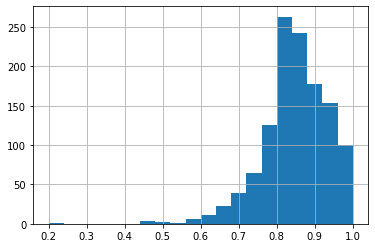

In [34]:
df['percent_known_ingredients'].hist(bins=20)

In [35]:
#find optimal threshold to override ingredient ratings with not enough known ingredients 
thresholds = [1, .9, .8, .75, .7, .66,.6, .5]
percents = []
for i in thresholds:
    percent_kept = len(df[df.percent_known_ingredients >= i])/ len(df)
    percents.append(percent_kept)
    print(i, ':',percent_kept) 

1 : 0.04702970297029703
0.9 : 0.3085808580858086
0.8 : 0.7722772277227723
0.75 : 0.8927392739273927
0.7 : 0.948019801980198
0.66 : 0.9735973597359736
0.6 : 0.9917491749174917
0.5 : 0.9966996699669967


Text(0, 0.5, 'percent of data kept')

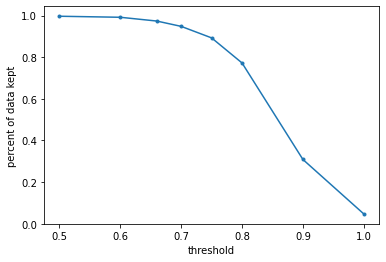

In [36]:
plt.plot(thresholds, percents, marker='.')
plt.xlabel('threshold')
plt.ylabel('percent of data kept')

In [37]:
#only keep ingredient ratings of products where 70% of ingredients or above are known 
df.loc[df[df.percent_known_ingredients < .7].index, 'ingredients_rating'] = np.nan

In [38]:
df.ingredients_rating.describe()

count    1149.000000
mean       71.699739
std         9.720995
min        33.000000
25%        66.000000
50%        73.000000
75%        79.000000
max       101.000000
Name: ingredients_rating, dtype: float64

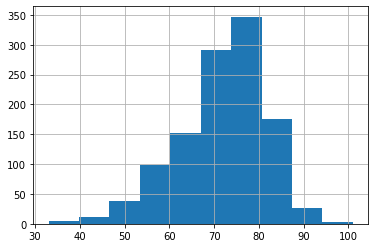

In [39]:
#distribution of product ingredient ratings
df.ingredients_rating.hist()

In [40]:
df[df.ingredients_rating == df.ingredients_rating.max()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,combination,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating,percent_known_ingredients
327,Herbivore Emerald CBD + Adaptogens Deep Moistu...,https://www.sephora.com/product/emerald-cbd-ad...,serum,Herbivore,Emerald CBD + Adaptogens Deep Moisture Glow Oil,NaN,58.0,what it is: a soothing face oil packed with 10...,1 oz,"[squalane, limnanthes alba (meadowfoam) seed o...",...,True,False,True,False,True,False,True,True,101.0,0.82


In [41]:
find_ingredients('Herbivore Emerald CBD +')

------------
Herbivore Emerald CBD + Adaptogens Deep Moisture Glow Oil
------------
number of ingredients: 11
known: 9
unknown:  2
------------
unknown ingredients:
7. borago officinalis
10. helichrysum stoechas flower extract
------------
ingredient ratings:
Best: ['1. squalane', '2. limnanthes alba', '3. cannabis (hemp) sativa seed oil', '6. helianthus annuus (sunflower) seed oil', '8. cannabidiol', '9. tocopheryl acetate', '11. cannabis sativa (cannabis/ hemp) seed extract']
-----
Good: ['4. coconut', '5. dha']
-----
unweighted ingredient rating: 91.0
rating breakdown:
Best: 7
Good: 2


In [42]:
#limit max rating to 100
df['ingredients_rating'] = df.ingredients_rating.apply(lambda x: min(x, 100))

In [43]:
df.head()

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,combination,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating,percent_known_ingredients
0,Youth To The People Superfood Antioxidant Clea...,https://www.sephora.com/product/kale-spinach-g...,cleanser,Youth To The People,Superfood Antioxidant Cleanser,4.3,36.0,what it is: an award-winning face wash with co...,8 oz,"[water, cocamidopropyl hydroxysultaine, sodium...",...,True,False,False,False,True,False,True,True,80.0,0.86
1,Fresh Soy Makeup Removing Face Wash,https://www.sephora.com/product/soy-face-clean...,cleanser,Fresh,Soy Makeup Removing Face Wash,4.4,38.0,what it is: a bestselling three-in-one face wa...,5.1 oz,"[water, coco-glucoside, glycerin, butylene gly...",...,True,True,False,False,False,False,True,True,82.0,0.95
2,Farmacy Green Clean Makeup Removing Cleansing ...,https://www.sephora.com/product/green-clean-ma...,cleanser,Farmacy,Green Clean Makeup Removing Cleansing Balm,4.5,34.0,what it is: a makeup remover and face cleanser...,3.4 oz,"[cetyl ethylhexanoate, caprylic/capric triglyc...",...,True,False,False,False,True,False,True,True,53.0,0.70
3,Tatcha The Deep Cleanse Gentle Exfoliating Cle...,https://www.sephora.com/product/the-deep-clean...,cleanser,Tatcha,The Deep Cleanse Gentle Exfoliating Cleanser,4.2,38.0,which skin type is it good for?\n✔ normal\n✔ o...,5 oz,"[water, sodium cocoyl glutamate, propanediol, ...",...,True,True,False,False,False,False,True,True,68.0,0.77
4,Tatcha The Rice Wash Skin-Softening Cleanser,https://www.sephora.com/product/tatcha-the-ric...,cleanser,Tatcha,The Rice Wash Skin-Softening Cleanser,4.6,35.0,"what it is: a ph-neutral, daily cream cleanser...",4.0 oz,"[aqua/water/eau, microcrystalline cellulose, p...",...,True,False,False,False,False,False,False,True,68.0,0.87


### weighted ratings

In [44]:
#create function that calculates a weighted rating of ingredients based on how high up on the list the ingredient is 
def calculate_weighted_rating(ingredients, shift = 0, percent=False, threshold= .70):
    #initialize ratings, number of known/unknown ingredients
    rating_list = []
    overall_total = 0
    num_known = 0
    no_matches = 0
    #loop through ingredients and skincare dictionary to find a match
    for i in ingredients:
        match = False
        for j in skincare_ingredients.ingredient:
            if j in i:
                if (j not in problem_ingredients) or ((j in problem_ingredients) and (j == i)):
                    match = True
                    #grab rating from skincare dictionary
                    num_rating = skincare_ingredients[skincare_ingredients.ingredient == j].rating_num.values[0]
                    #running total of ratings
                    rating_list.append(num_rating)
                    #increase number of known ingredients by 1
                    num_known += 1
                    #stop searching through skincare dictionary once match for ingredient is found
                    break
        
        #if there is no match, increase number of unknown ingredients by 1
        if not match: 
            no_matches+=1
    
    #find the percent of known ingredients
    percent_known = round(num_known/(num_known+no_matches),2)
            
    if percent:
        return percent_known
        
    if percent_known  >= .7:
        try:      
            if num_known < 10:
                #if there are less than 10 known ingredients, add ratings to total without weights
                overall_total = sum(rating_list)/ num_known
            else:
                #split ratings into equal sized chunks
                chunks = splitter(rating_list)
                #weight chunks in reverse order 
                chunks.reverse()
                #for each chunk, multiply chunk average by the weight and add to total
                for i, chunk in enumerate(chunks):
                    weight = (i+1)/10
                    chunk_total = weight* sum(chunk) / len(chunk)
                    overall_total += chunk_total
                    
            #scale total by 20, shift, and round
            rating = round(overall_total * 20+ shift)
            return min(rating, 100)
            
        #error handling
        except Exception as e:
            print('error could not calculate rating:', e)
            return np.nan
    else:
        return np.nan

In [45]:
#function that splits ingredient lists in quarters
def splitter(lst, num_chunks=4):
    chunk_size, leftover = divmod(len(lst), num_chunks)
    chunks = []
    for i in range(num_chunks):
        if i < num_chunks-leftover:
            start = i*chunk_size 
            end = start + chunk_size
            chunk = lst[start: end]
            chunks.append(chunk)
        else:
            chunk = lst[end: end+ chunk_size + 1 ]
            end = end+ chunk_size + 1
            chunks.append(chunk)
    return chunks

In [46]:
df['ingredients_rating'] = df.ingredient_list.apply(calculate_weighted_rating, shift=10)

In [47]:
df.ingredients_rating.isnull().sum()

63

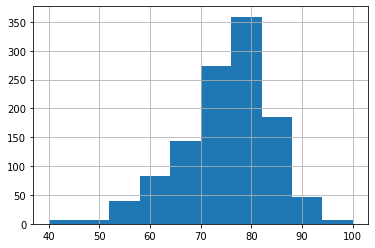

In [48]:
df.ingredients_rating.hist()

In [49]:
df.ingredients_rating.describe()

count    1149.000000
mean       74.631854
std         8.911844
min        40.000000
25%        70.000000
50%        76.000000
75%        80.000000
max       100.000000
Name: ingredients_rating, dtype: float64

In [50]:
#create ingredient list grade for every product
bins = [0,55,65,75,85,100]
labels = ['F','D', 'C', 'B', 'A']
df['grade'] = pd.cut(df['ingredients_rating'], bins=bins, labels=labels)

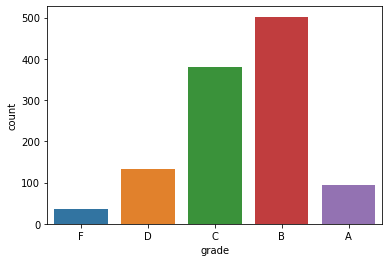

In [51]:
sns.countplot(df.grade)

In [52]:
df[df.ingredients_rating ==df.ingredients_rating.max()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating,percent_known_ingredients,grade
327,Herbivore Emerald CBD + Adaptogens Deep Moistu...,https://www.sephora.com/product/emerald-cbd-ad...,serum,Herbivore,Emerald CBD + Adaptogens Deep Moisture Glow Oil,NaN,58.0,what it is: a soothing face oil packed with 10...,1 oz,"[squalane, limnanthes alba (meadowfoam) seed o...",...,False,True,False,True,False,True,True,100.0,0.82,A
591,Dr. Jart+ Focuspot™ Dark Circle Micro Tip™ Patch,https://www.sephora.com/product/focuspot-dark-...,serum,Dr. Jart+,Focuspot™ Dark Circle Micro Tip™ Patch,3.0,18.0,what it is: a set of self-dissolving micro tip...,4 patches,"[sodium hyaluronate, glycerin, oxidized glutat...",...,False,False,False,False,False,False,True,100.0,0.79,A


In [53]:
df[df.ingredients_rating ==df.ingredients_rating.min()]

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating,percent_known_ingredients,grade
872,Origins Clear Improvement™ Pore Clearing Moist...,https://www.sephora.com/product/clear-improvin...,moisturizer,Origins,Clear Improvement™ Pore Clearing Moisturizer w...,NaN,36.0,what it is: an acne treatment and oil-free moi...,1.7 oz,"[water, ethylhexyl palmitate, ppg-14 butyl eth...",...,False,False,True,False,False,False,True,40.0,0.86,F


In [54]:
df.sort_values('ingredients_rating')

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating,percent_known_ingredients,grade
872,Origins Clear Improvement™ Pore Clearing Moist...,https://www.sephora.com/product/clear-improvin...,moisturizer,Origins,Clear Improvement™ Pore Clearing Moisturizer w...,NaN,36.0,what it is: an acne treatment and oil-free moi...,1.7 oz,"[water, ethylhexyl palmitate, ppg-14 butyl eth...",...,False,False,True,False,False,False,True,40.0,0.86,F
531,Clarins Lotus Face Treatment Oil,https://www.sephora.com/product/lotus-face-tre...,serum,Clarins,Lotus Face Treatment Oil,4.4,60.0,what it is:\na natural astringent for oily or ...,1 oz,"[corylus avellana (hazel) seed oil, pelargoniu...",...,False,False,False,False,False,False,False,41.0,0.75,F
349,Mario Badescu Drying Lotion,https://www.sephora.com/product/mario-badescu-...,serum,Mario Badescu,Drying Lotion,NaN,17.0,"what it is: an original, award-winning solutio...",1 oz,"[isopropyl alcohol, water, calamine, zinc oxid...",...,False,False,True,True,False,False,True,41.0,1.00,F
132,Dr. Jart+ Dermaclear™ Micro Foam,https://www.sephora.com/product/dermaclear-mic...,cleanser,Dr. Jart+,Dermaclear™ Micro Foam,4.4,22.0,"what it is: a creamy, hypoallergenic foaming p...",4.05 oz,"[water, melaleuca alternifolia (tea tree) leaf...",...,False,False,False,False,False,False,True,41.0,0.80,F
174,Mario Badescu Glycolic Foaming Cleanser,https://www.sephora.com/product/mario-badescu-...,cleanser,Mario Badescu,Glycolic Foaming Cleanser,4.3,16.0,what it is: a resurfacing face wash that refin...,6 oz,"[sodium lauryl sulfate, water, cocamidopropyl ...",...,False,False,False,False,False,True,True,43.0,0.81,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,COOLA Full Spectrum 360° Mineral Sun Silk Mois...,https://www.sephora.com/product/coola-suncare-...,moisturizer,COOLA,Full Spectrum 360° Mineral Sun Silk Moisturize...,NaN,42.0,what it is: an ultra-rich priming cream that d...,1.5 oz,"[zinc oxide - 135%, amyl vinyl carbinol, anisa...",...,False,False,False,True,False,True,True,NaN,0.48,NaN
1117,Primera Gentle Comfort Hydrating Cream for Sen...,https://www.sephora.com/product/primera-gentle...,moisturizer,Primera,Gentle Comfort Hydrating Cream for Sensitive Skin,NaN,35.0,what it is: a daily moisturizer that is packed...,1.0 oz,"[water, butylene glycol, glycerin, butylene gl...",...,True,True,False,False,False,False,True,NaN,0.68,NaN
1163,Supergoop! Invincible Setting Powder SPF 45,https://www.sephora.com/product/invincible-set...,sunscreen,Supergoop!,Invincible Setting Powder SPF 45,3.3,30.0,which skin type is it good for?\n✔ normal\n✔ o...,0.15 oz,"[calcium aluminum borosilicate, silica, polyme...",...,True,False,False,False,False,True,True,NaN,0.62,NaN
1178,COOLA Full Spectrum 360° Refreshing Water Mist...,https://www.sephora.com/product/coola-suncare-...,sunscreen,COOLA,Full Spectrum 360° Refreshing Water Mist Organ...,4.7,36.0,"what it is: a beauty-enhancing, alcohol-free s...",1.7 oz,"[avobenzone 2%, homosalate 10%, octisalate 5%,...",...,False,False,False,True,False,False,True,NaN,0.50,NaN


In [55]:
#products with top rated ingredients
df[df.grade == 'A'].sort_values('ingredients_rating', ascending=False)

,full_name,url,category,brand,name,customer_rating,price,descriptions,productsize,ingredient_list,...,sensitive,redness,acne,aging,spots,dull,normal,ingredients_rating,percent_known_ingredients,grade
591,Dr. Jart+ Focuspot™ Dark Circle Micro Tip™ Patch,https://www.sephora.com/product/focuspot-dark-...,serum,Dr. Jart+,Focuspot™ Dark Circle Micro Tip™ Patch,3.0,18.0,what it is: a set of self-dissolving micro tip...,4 patches,"[sodium hyaluronate, glycerin, oxidized glutat...",...,False,False,False,False,False,False,True,100.0,0.79,A
327,Herbivore Emerald CBD + Adaptogens Deep Moistu...,https://www.sephora.com/product/emerald-cbd-ad...,serum,Herbivore,Emerald CBD + Adaptogens Deep Moisture Glow Oil,NaN,58.0,what it is: a soothing face oil packed with 10...,1 oz,"[squalane, limnanthes alba (meadowfoam) seed o...",...,False,True,False,True,False,True,True,100.0,0.82,A
414,Dr. Lara Devgan Scientific Beauty Hyaluronic S...,https://www.sephora.com/product/dr-lara-devgan...,serum,Dr. Lara Devgan Scientific Beauty,Hyaluronic Serum,NaN,245.0,what it is: a serum that visibly increases ski...,1 oz,"[water, glycerin, niacinamide, sodium chondroi...",...,False,False,False,True,False,False,True,97.0,0.93,A
587,Dr. Zenovia Skincare Hyaluronic Acid + Peptide...,https://www.sephora.com/product/dr-zenovia-ski...,serum,Dr. Zenovia Skincare,Hyaluronic Acid + Peptide Serum,4.5,72.0,what it is: an ultra-light serum with hyaluron...,1 oz,"[purified water, glycerin, sodium pca, sodium ...",...,False,False,False,False,False,False,True,96.0,0.90,A
18,Drunk Elephant Slaai™ Makeup-Melting Butter Cl...,https://www.sephora.com/product/slaai-makeup-m...,cleanser,Drunk Elephant,Slaai™ Makeup-Melting Butter Cleanser,3.8,34.0,what it is: an innovative cleansing balm that ...,NaN,"[ethylhexyl palmitate, caprylic/capric triglyc...",...,False,True,False,False,False,True,True,96.0,0.70,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Skinfix Barrier+ Triple Lipid-Peptide Face Lotion,https://www.sephora.com/product/barrier-lipid-...,moisturizer,Skinfix,Barrier+ Triple Lipid-Peptide Face Lotion,NaN,38.0,"what it is: a lightweight, yet hydrating lotio...",1.7 oz,"[water, dicaprylyl carbonate, caprylic/capric ...",...,False,False,False,False,False,True,True,86.0,0.79,A
788,Peter Thomas Roth Water Drench® Full-Size Hydr...,https://www.sephora.com/product/peter-thomas-r...,moisturizer,Peter Thomas Roth,Water Drench® Full-Size Hydration Haul 3-Piece...,NaN,65.0,what it is: a three-piece kit of full-size wat...,NaN,"[water/aqua/eau, glycerin, cyclopentasiloxane,...",...,False,False,False,False,False,False,True,86.0,0.91,A
647,Dr Roebuck's Tassie Anti-Pollution Serum,https://www.sephora.com/product/tassie-anti-po...,serum,Dr Roebuck's,Tassie Anti-Pollution Serum,NaN,60.0,what it is: a super-potent and unique serum ri...,1 oz,"[water, propanediol, niacinamide, aloe barbade...",...,False,False,False,True,False,True,True,86.0,0.86,A
692,Peter Thomas Roth Water Drench Hyaluronic Acid...,https://www.sephora.com/product/water-drench-h...,moisturizer,Peter Thomas Roth,Water Drench Hyaluronic Acid Moisturizer,NaN,52.0,what it is: a 30 percent hyaluronic acid compl...,1.7 oz,"[water/aqua/eau, glycerin, cyclopentasiloxane,...",...,False,False,False,False,False,False,True,86.0,0.91,A


In [56]:
#brands with the most A grade products
df[df.grade=='A'].groupby('brand').grade.count().sort_values(ascending=False).head(9)

brand
Drunk Elephant               10
Dr. Dennis Gross Skincare     7
Peter Thomas Roth             5
Skinfix                       4
Dr. Zenovia Skincare          4
Dr. Jart+                     4
MILK MAKEUP                   4
Josie Maran                   3
First Aid Beauty              3
Name: grade, dtype: int64

In [57]:
#calculate average brand ingredient ratings 
average_brand_ratings = df.groupby('brand').ingredients_rating.sum() / df.groupby('brand').ingredients_rating.count()

In [58]:
#brands with the highest average product ingredient ratings
average_brand_ratings.sort_values(ascending=False)

brand
Dr. Lara Devgan Scientific Beauty    94.000000
StackedSkincare                      91.000000
Lord Jones                           88.000000
Drunk Elephant                       87.000000
Dr Roebuck's                         86.000000
                                       ...    
Indie Lee                            65.500000
Mario Badescu                        65.000000
Shiseido                             63.075000
St. Tropez                           58.000000
Origins                              56.740741
Name: ingredients_rating, Length: 114, dtype: float64

In [59]:
#create a dataframe of brands
brands = average_brand_ratings.reset_index()
#number of products in the brand
brand_counts = df.groupby('brand').name.count()
brands['product_count'] = brand_counts.values

In [60]:
#brands with 5 or more products with the highest rating
brands[brands.product_count >= 5].sort_values('ingredients_rating', ascending=False).head(10)

,brand,ingredients_rating,product_count
22,Drunk Elephant,87.000000,18
21,Dr. Zenovia Skincare,85.000000,9
82,SOBEL SKIN Rx,84.250000,6
18,Dr. Dennis Gross Skincare,83.944444,18
88,Skinfix,83.285714,7
6,Biossance,81.625000,10
31,First Aid Beauty,81.312500,16
34,Glow Recipe,81.166667,7
108,boscia,81.142857,8
101,Volition Beauty,81.000000,5


In [61]:
#add average customer rating to brands df
brands['avg_customer_rating']= df.groupby('brand').customer_rating.mean().values

In [62]:
#brands with highest average customer rating
brands[brands.product_count >= 5].sort_values('avg_customer_rating', ascending=False).head(10)

,brand,ingredients_rating,product_count,avg_customer_rating
104,Yves Saint Laurent,74.250000,10,4.700000
78,Proactiv,71.333333,9,4.700000
41,Jack Black,76.333333,6,4.600000
5,BeautyBio,77.714286,7,4.566667
88,Skinfix,83.285714,7,4.525000
70,Omorovicza,74.800000,5,4.500000
2,Alpha-H,75.875000,8,4.500000
21,Dr. Zenovia Skincare,85.000000,9,4.460000
65,Naturally Serious,80.000000,6,4.450000
48,L'Occitane,71.000000,6,4.450000


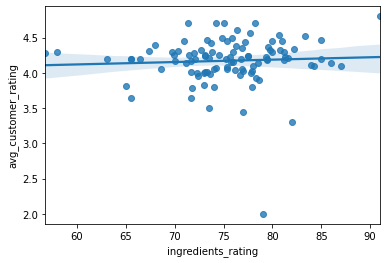

In [63]:
#correlation of customer rating and ingredient rating
sns.regplot(brands.ingredients_rating, brands.avg_customer_rating)

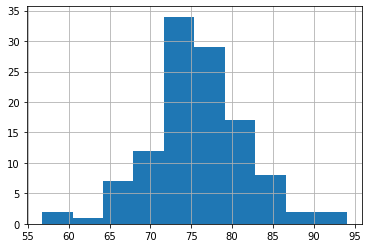

In [64]:
#distribution of average brand ingredient ratings 
brands.ingredients_rating.hist()

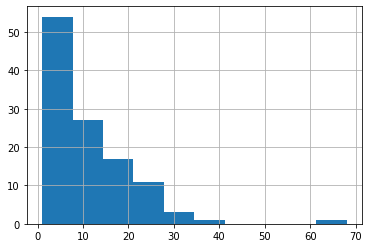

In [65]:
#distribution of brand product counts
brands.product_count.hist()

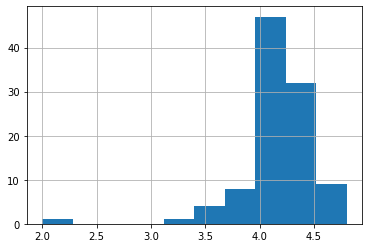

In [66]:
#distribution of average customer ratings for each brand
brands.avg_customer_rating.hist()

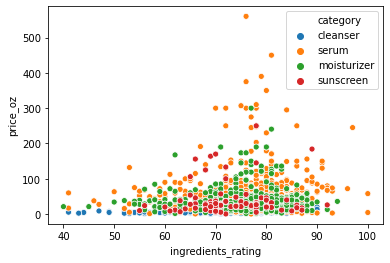

In [67]:
#scatter plot of ingredients rating and price per oz
sns.scatterplot(df.ingredients_rating, df.price_oz, hue=df.category)

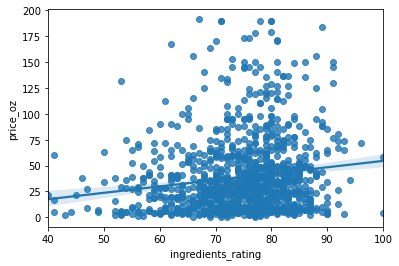

In [68]:
sns.regplot(df[df.price_oz <= 200].ingredients_rating, df[df.price_oz <= 200].price_oz)

In [69]:
brands['avg_price_oz'] = df.groupby('brand').price_oz.mean().values

In [70]:
brands.sort_values('avg_price_oz', ascending=False)

,brand,ingredients_rating,product_count,avg_customer_rating,avg_price_oz
20,Dr. Lara Devgan Scientific Beauty,94.000000,2,NaN,195.000000
16,Dr. Barbara Sturm,78.307692,28,3.933333,159.286296
0,AMOREPACIFIC,77.222222,10,4.433333,143.700000
92,StackedSkincare,91.000000,2,4.800000,140.000000
35,Guerlain,72.333333,6,4.000000,139.093333
...,...,...,...,...,...
40,Indie Lee,65.500000,2,3.650000,8.100000
80,SEPHORA COLLECTION,71.652174,23,4.006667,6.371304
90,Sol de Janeiro,68.000000,1,NaN,4.500000
87,Skin Laundry,76.000000,1,4.300000,2.990000


In [72]:
df.to_csv('df completed.csv')

In [ ]:
brands.to_csv('brands.csv')